# 판다스(panda) 심화

## 기본 데이터 프레임 정렬

In [88]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {
        'col1':[2,1,9,8,7,4],
        'col2':['A','B','B',np.nan,'D','C'],
        'col3':[0,1,9,4,2,3]
} 
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,B,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [89]:
# index(행)axis=0을 축으로
df=df.sort_index(axis=0)

# index(열)axis=1을 축으로 내림차순
df=df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,B,1
4,3,C,4
5,4,NaN,8


In [90]:
# sort_value
df.sort_values('col1',ascending=True)

,col3,col2,col1
3,1,B,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [91]:
sorted_df2=df.sort_values(['col2','col1'],ascending=[True,False])
sorted_df2

,col3,col2,col1
1,0,A,2
2,9,B,9
3,1,B,1
4,3,C,4
0,2,D,7
5,4,NaN,8


In [92]:
# 데이터 
import numpy as np
import pandas as pd
data ={
    'korean' : [50,60,70,30],
    'math' : [30, np.nan, 40,20]
}
index =['a','b','c','d']
df = pd.DataFrame(data,index=index)

print(df.index)
print(df.columns)

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')


In [93]:
# count() 함수
print(df.count(axis=0)) #axis = 0 기본값(생략가능)
print(df.count(axis=1)) 

korean    4
math      3
dtype: int64
a    2
b    1
c    2
d    2
dtype: int64


In [94]:
# max(), min(), sum(), mean()


print(df.max(axis=1))
print(df.min(axis=1))
print(df.sum())
print(df.mean(axis=1))
print(df.mean(axis=1,skipna=False))



a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [95]:
# 결측값 대체 fillna
avg=(df['math']).mean
df['math']=df['math'].fillna(avg)
df

,korean,math
a,50,30.0
b,60,<bound method Series.mean of a 30.0\nb ...
c,70,40.0
d,30,20.0


## 그룹으로 묶기 groupby()

In [96]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data1':[1,2,3,1,2,3],
    'data2':[4,4,6,0,6,1],
    # 'data2':['안녕','a','b','하세요','pple','3'],
})
print("DataFrame:")
df

DataFrame:


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [97]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [98]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [99]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [100]:
df.groupby('key').aggregate({
    'data1':'max','data2':'sum'
})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [101]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [102]:
def ffilte_mean(x):
    return x['data2'].mean()>3
df.groupby('key').filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [103]:
df.groupby('key').filter(
    lambda x: x['data2'].mean()>3
)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [104]:
df1=df.groupby('key').get_group('A')
df2=df.groupby('key').get_group('B')
df3=df.groupby('key').get_group('C')
df4=pd.concat([df1,df3],axis=1) # axis=1 컬럼방향, 기본은  행방향 axis=0
df5=pd.concat([df2,df3],axis=1)
means = df2['data2'].astype(int).mean()
means
df5.fillna(1) # 1 으로 결측값을 채움
#.ffill()
#.bfill()
# deprecated(지원안함 이라는뜻)

,key,data1,data2,key,data1,data2
1,B,2.0,4.0,1,1.0,1.0
4,B,2.0,6.0,1,1.0,1.0
2,1,1.0,1.0,C,3.0,6.0
5,1,1.0,1.0,C,3.0,1.0


In [105]:
# filter
t=list(range(1,11))
result=[]
def is_even(x):
    return True if x%2==0 else False

for i in t:
    if is_even(i):
        result.append(i)
print(result)

[2, 4, 6, 8, 10]


In [106]:
t=list(range(1,11))
result=[]
def is_even(x):
    return True if x%2==0 else False
result=filter(is_even, t)
print(list(result))

[2, 4, 6, 8, 10]


In [107]:
t=list(range(1,11))
result=[]
result=filter(lambda x:x%2==0, t)

print(list(result))

[2, 4, 6, 8, 10]


## 피봇과 피봇 테이블

In [108]:
# pivot, pivot_table 가로형, 재결합, 재가공의  느낌
import pandas as pd
df = pd.DataFrame([
    ['20210901','A', 1],
    ['20210901','B', 10],
    ['20210901','C', 100],
    ['20210902','A', 2],
    ['20210902','B', 20],
    ['20210902','C', 200],
    ['20210903','A', 3],
    ['20210903','B', 30],
    ['20210903','C', 300],
],columns=['date','type','volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [109]:
pivot1 = df.pivot(index="date",columns="type",values="volume")
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [110]:
pivot1.columes = pivot1.columns.values
pivot1

C:\Users\Admin\AppData\Local\Temp\ipykernel_15052\3068406460.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pivot1.columes = pivot1.columns.values


type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [114]:
pivot1.reset_index(level=0, inplace=True)
pivot1

type,index,date,A,B,C
0,0,20210901,1,10,100
1,1,20210902,2,20,200
2,2,20210903,3,30,300


In [115]:
pivot1=pivot1.set_index('date')
pivot1

type,index,A,B,C
date,,,,
20210901,0,1,10,100
20210902,1,2,20,200
20210903,2,3,30,300


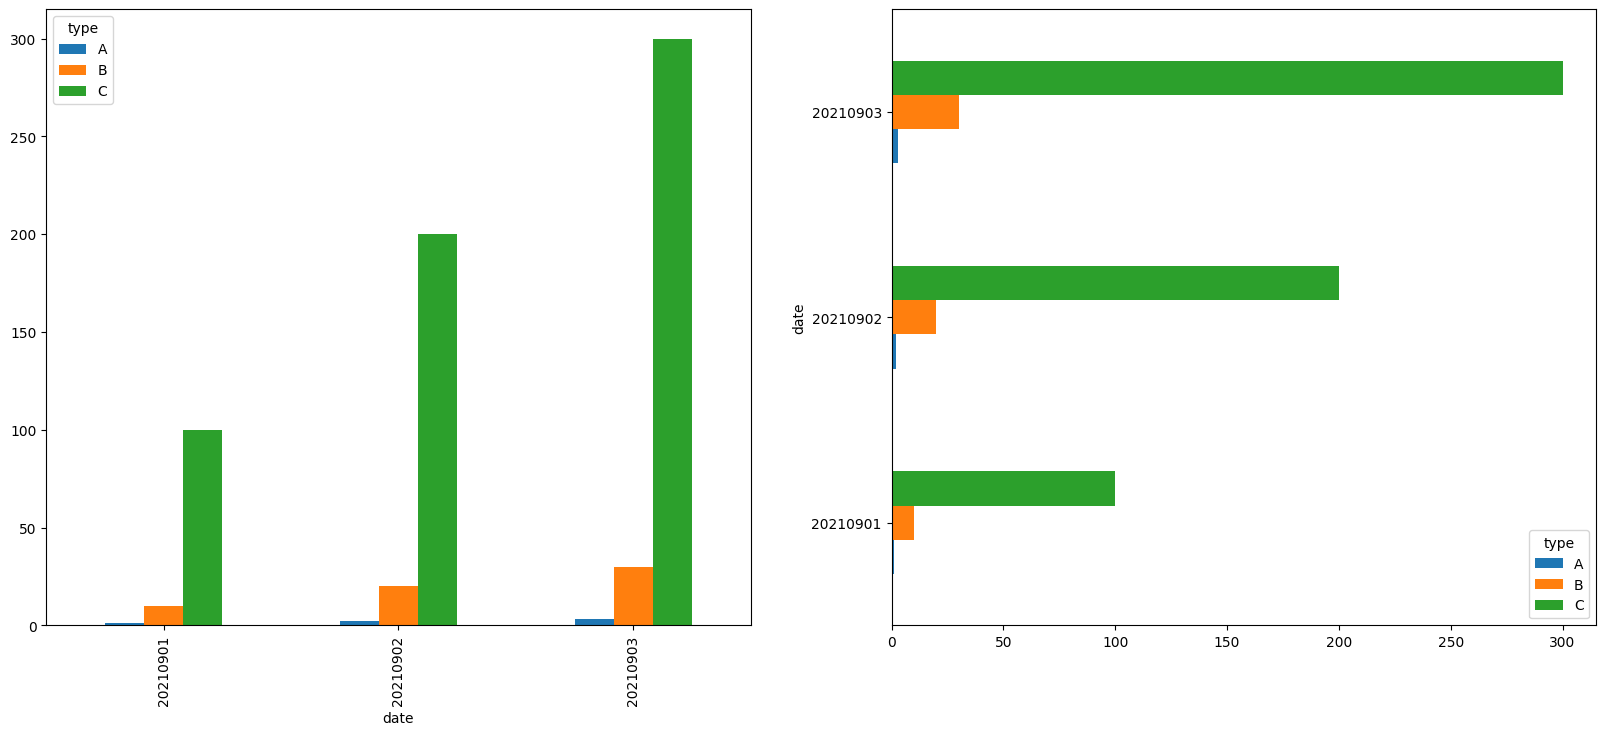

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
pivot1.plot(kind='bar', ax=ax[0])
pivot1.plot(kind='barh', ax=ax[1])
plt.show()

In [79]:
import numpy as np
import pandas as pd
df=pd.DataFrame({
    '지역':['안동','안동','안동','경기',
         '경기','부산','서울','안동'],
    '요일':['월','월','수','월','화',
         '월','목','금'],
    '강수확률':[80,70,90,10,20,30,40,80],
    '강수량':[80,50,100,200,200,100,50,1000]
})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [85]:
pd.pivot_table(df, index='요일',
              columns='지역',
              aggfunc='max')

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금     NaN    NaN   NaN  1000.0   NaN   NaN   NaN  80.0
목     NaN    NaN  50.0     NaN   NaN   NaN  40.0   NaN
수     NaN    NaN   NaN   100.0   NaN   NaN   NaN  90.0
월   200.0  100.0   NaN    80.0  10.0  30.0   NaN  80.0
화   200.0    NaN   NaN     NaN  20.0   NaN   NaN   NaN

In [84]:
pd.pivot_table(df, index='요일',
              columns='지역',
              aggfunc='max').fillna(' ')

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [117]:
data ={
    "도시":["서울","부산",'서울','부산','대구','대구','대구'],
    '연도':[2022,2022,2023,2023,2022,2023,2023],
    '판매량':[100,80,120,90,70,60,0],
}
df =pd.DataFrame(data)
pivot = df.pivot_table(index='도시',columns='연도',values='판매량',aggfunc='min',fill_value=0)
pivot

연도,2022,2023
도시,,
대구,70,0
부산,80,90
서울,100,120
